In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import random
import time

In [19]:
# Lee el archivo CSV
ciudades_df = pd.read_csv('/content/capitales_mexico (2).csv')

# Extrae las coordenadas en una lista o array
coordenadas = ciudades_df[['Latitud', 'Longitud']].values
n_ciudades = len(coordenadas)


In [20]:
!pip install -U kaleido
!pip install imageio

In [21]:
costos = np.load('costos.npy')
print(costos)


[[           inf  7099.93541534  4040.55702857 ...  3392.84625397
   7318.29974339   400.99101058]
 [ 6826.28899312            inf  3398.1261746  ... 12168.87710159
  10130.21156878  6478.48313016]
 [ 5691.42675873  3398.05020476            inf ...  9729.30823122
  13554.76038783  5243.62222857]
 ...
 [ 3485.43427513  7099.3117381   5462.71597884 ...            inf
   4204.55324233  3076.57957619]
 [ 7356.74002593 12839.95453651  8279.02306243 ...  4248.35505132
             inf  6947.88665979]
 [  405.45723757  6752.39344762  3691.01506085 ...  3893.46561481
   7718.91910423            inf]]


In [22]:
print(*costos)

[          inf 7099.93541534 4040.55702857 6885.09232275 5828.57903492
 3510.55518413 2196.21895291 1340.46628519 2215.83851746 1206.85206984
  902.72922857 3279.50021217 2159.36627302 1176.43551111 1952.5759418
 1479.25262751 2551.26528148 2398.37728519 1828.8860836  4015.31766032
 2935.87931587 1323.56852381 7050.22116825  517.7975381  2249.26509471
 3839.40372487 5430.7911582  1764.97853915 2743.29145873 3392.84625397
 7318.29974339  400.99101058] [ 6826.28899312            inf  3398.1261746   9697.00548095
  8890.49086032  3329.34528148 10972.9321963   6238.20973757
  9272.47577513  7025.33108783  9677.85153915 12047.78766138
 10935.39578783  8390.61321429 10535.29801905  9683.14561005
 11319.55406349  7265.64730741  4963.65384497 12791.34717513
 11711.90883069  9837.22361111 10250.13432646  6977.74576508
  4711.47223333  2069.51352328  8682.7043164   5630.93070899
 11519.32230635 12168.87710159 10130.21156878  6478.48313016] [ 5691.42675873  3398.05020476            inf 13121.5543

In [23]:
n_hormigas = 100
n_iteraciones = 200
alpha = 1.0  # Importancia de la feromona
beta = 5.0   # Importancia de la visibilidad (1/costo)
evaporacion = 0.2
feromona_inicial = 1.0


In [24]:
feromonas = np.ones((n_ciudades, n_ciudades)) * feromona_inicial


Iteración 1: Mejor costo = 44754.25164761904
Iteración 2: Mejor costo = 44754.25164761904
Iteración 3: Mejor costo = 44754.25164761904
Iteración 4: Mejor costo = 44754.25164761904
Iteración 5: Mejor costo = 44341.630126455035
Iteración 6: Mejor costo = 44341.630126455035
Iteración 7: Mejor costo = 44341.630126455035
Iteración 8: Mejor costo = 44341.630126455035
Iteración 9: Mejor costo = 44341.630126455035
Iteración 10: Mejor costo = 44341.630126455035
Iteración 11: Mejor costo = 44341.630126455035
Iteración 12: Mejor costo = 44341.630126455035
Iteración 13: Mejor costo = 44341.630126455035
Iteración 14: Mejor costo = 44341.630126455035
Iteración 15: Mejor costo = 44341.630126455035
Iteración 16: Mejor costo = 43877.69097936508
Iteración 17: Mejor costo = 43877.69097936508
Iteración 18: Mejor costo = 43877.69097936508
Iteración 19: Mejor costo = 43877.69097936508
Iteración 20: Mejor costo = 43877.69097936508
Iteración 21: Mejor costo = 43877.69097936508
Iteración 22: Mejor costo = 4387

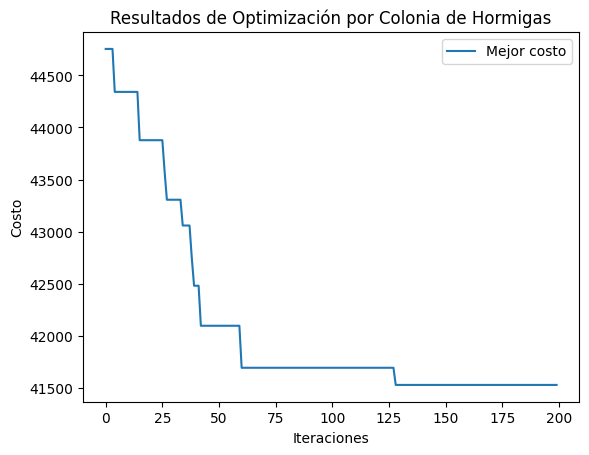

In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Matriz de feromonas inicializada con unos. Representa la cantidad de feromonas entre las ciudades.
feromonas = np.ones((n_ciudades, n_ciudades))

def aco():
    mejor_costo = np.inf # Inicializamos el mejor costo como infinito (no se conoce uno mejor aún).
    mejor_ruta = None    # Inicializamos la mejor ruta como nula.
    historial_costos = [] # Lista para almacenar el costo mínimo de cada iteración.
    mejores_rutas = []  # Lista para almacenar la mejor ruta de cada iteración

    for iteracion in range(n_iteraciones):
        rutas = []
        costos_rutas = []

        # Generar rutas para cada hormiga.
        for hormiga in range(n_hormigas):
            # Inicia la ruta seleccionando aleatoriamente la primera ciudad.
            ruta = [random.randint(0, n_ciudades - 1)]

            # Construcción de la ruta hasta visitar todas las ciudades.
            while len(ruta) < n_ciudades:
                i = ruta[-1]  # Última ciudad visitada.
                probabilidades = []   # Lista de probabilidades de visitar cada ciudad.

                # Calcular probabilidades para las ciudades no visitadas.
                for j in range(n_ciudades):
                    if j not in ruta:   # Solo considerar ciudades no visitadas.
                        tau = feromonas[i][j] ** alpha  # Influencia de las feromonas.
                        eta = (1.0 / costos[i][j]) ** beta
                        probabilidades.append(tau * eta)
                    else:
                        probabilidades.append(0)

                # Normalizar las probabilidades para que sumen 1.
                probabilidades = probabilidades / np.sum(probabilidades)

                 # Seleccionar la siguiente ciudad basada en las probabilidades calculadas.
                siguiente_ciudad = np.random.choice(range(n_ciudades), p=probabilidades)
                ruta.append(siguiente_ciudad)

            # Almacenar la ruta generada.
            rutas.append(ruta)

            # Calcular el costo de la ruta generada.
            costo_ruta = sum([costos[ruta[k]][ruta[k+1]] for k in range(n_ciudades - 1)])
            costo_ruta += costos[ruta[-1]][ruta[0]]  # Retorno al inicio
            costos_rutas.append(costo_ruta)

            # Actualizar la mejor ruta y costo si se encontró una mejor.
            if costo_ruta < mejor_costo:
                mejor_costo = costo_ruta
                mejor_ruta = ruta.copy()

        # Almacenar la mejor ruta de esta iteración
        mejores_rutas.append(mejor_ruta.copy())

        # Actualización de feromonas sin reasignación de variable
        feromonas[:] = feromonas * (1 - evaporacion)
        for ruta, costo_ruta in zip(rutas, costos_rutas):
            for k in range(n_ciudades - 1):
                i = ruta[k]
                j = ruta[k + 1]
                 # Incrementar las feromonas en las aristas de la ruta, inversamente proporcional al costo.
                feromonas[i][j] += 1.0 / costo_ruta
                feromonas[j][i] += 1.0 / costo_ruta  # Si es bidireccional

        # Almacenar el costo mínimo de esta iteración.
        historial_costos.append(mejor_costo)
        print(f"Iteración {iteracion + 1}: Mejor costo = {mejor_costo}")

    # Devolver los resultados finales: mejor ruta, mejor costo, historial de costos y rutas por iteración.
    return mejor_ruta, mejor_costo, historial_costos, mejores_rutas

# Ejecutar el algoritmo
mejor_ruta, mejor_costo, historial_costos, mejores_rutas = aco()

# Imprimir el mejor costo final
print(f"El mejor costo final es {mejor_costo}")

# Graficar el historial de costos
plt.plot(historial_costos, label='Mejor costo')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Resultados de Optimización por Colonia de Hormigas')
plt.legend()
plt.show()


In [26]:
# Obtener los nombres de las ciudades en el orden de la mejor ruta
ruta_ciudades = ciudades_df.iloc[mejor_ruta]['Capital'].values

# Imprimir la ruta final
print("Ruta óptima:")
for ciudad in ruta_ciudades:
    print(ciudad)


Ruta óptima:
San Francisco de Campeche
Mérida
Chetumal
Villahermosa
Tuxtla Gutiérrez
Oaxaca de Juárez
Puebla de Zaragoza
Tlaxcala de Xicohténcatl
Pachuca de Soto
Ciudad de México
Cuernavaca
Chilpancingo de los Bravo
Toluca de Lerdo
Santiago de Querétaro
Guanajuato
Morelia
Guadalajara
Colima
Tepic
Culiacán Rosales
La Paz
Mexicali
Hermosillo
Chihuahua
Victoria de Durango
Zacatecas
Aguascalientes
San Luis Potosí
Ciudad Victoria
Monterrey
Saltillo
Xalapa-Enríquez


<ipython-input-27-d2370e866fd5>:53: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'{output_dir}/frame_{k}.png'))


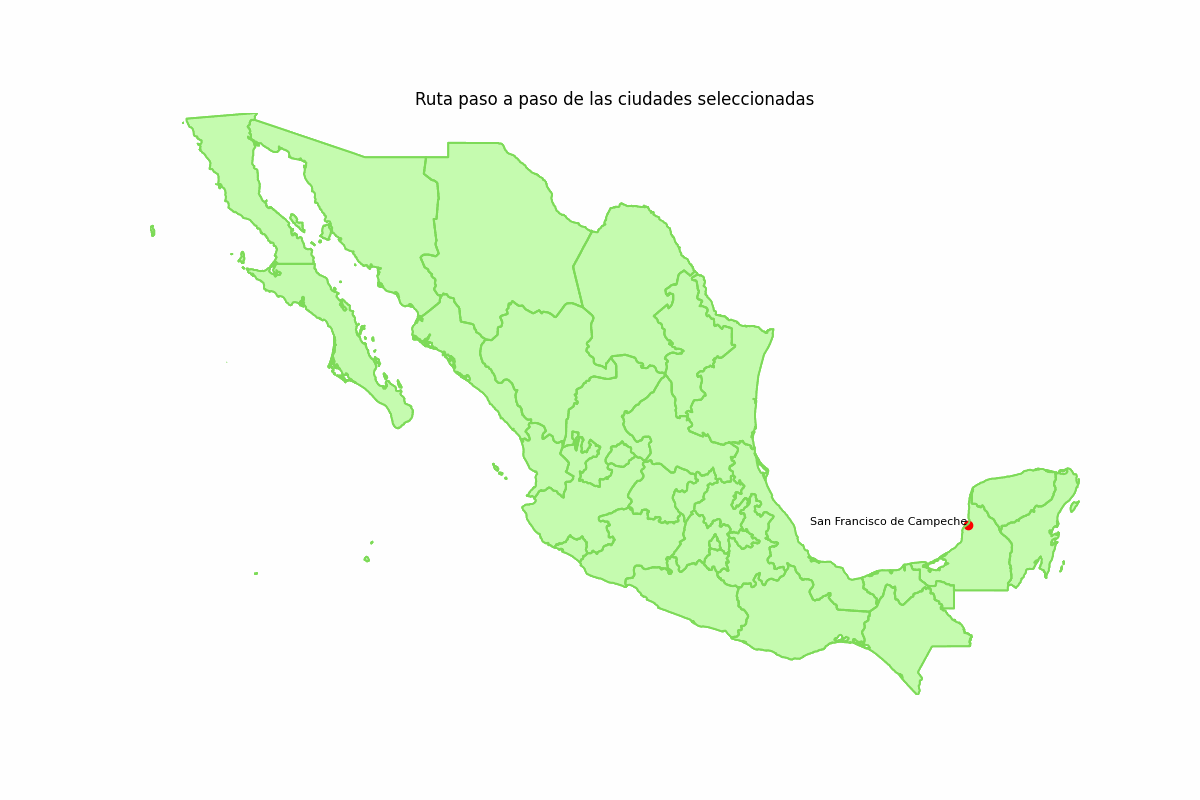

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import os
import geopandas as gpd
from IPython.display import Image

# Crear un directorio para guardar las imágenes
output_dir = 'frames'
os.makedirs(output_dir, exist_ok=True)

# Paso 3: Extraer las ciudades seleccionadas
ciudades_seleccionadas = ciudades_df.iloc[mejor_ruta]

# Mapa de México
mapa_mexico = gpd.read_file('mx.json')

# Paso 4: Crear el gráfico paso a paso y guardar cada imagen
for k in range(1, len(ciudades_seleccionadas) + 1):
    # Crear una nueva figura
    plt.figure(figsize=(12,8))

    mapa_mexico.boundary.plot(ax=plt.gca(), color='#7DDA58')  # Líneas de frontera del mapa en gris oscuro
    mapa_mexico.plot(ax=plt.gca(), color='#C6FCB0', edgecolor='#7DDA58')  # Territorio de México en gris claro

    # Trazar la línea entre las ciudades seleccionadas hasta el paso k
    plt.plot(ciudades_seleccionadas['Longitud'][:k], ciudades_seleccionadas['Latitud'][:k], color='red', linestyle='-')

    # Graficar los puntos de las ciudades hasta el paso k
    plt.scatter(ciudades_seleccionadas['Longitud'][:k], ciudades_seleccionadas['Latitud'][:k], color='red')

    # Añadir nombres a las ciudades
    for i, row in ciudades_seleccionadas.iloc[:k].iterrows():
        plt.text(row['Longitud'], row['Latitud'], row['Capital'], fontsize=8, ha='right')

    # Añadir títulos y etiquetas
    plt.title('Ruta paso a paso de las ciudades seleccionadas')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')

    # Desactivar la cuadrícula de fondo y los ejes
    plt.grid(False)
    plt.axis('off')
    plt.margins(0)

    # Guardar la imagen del frame actual
    plt.savefig(f'{output_dir}/frame_{k}.png')
    plt.close()

# Crear el GIF a partir de las imágenes
images = []
for k in range(1, len(ciudades_seleccionadas) + 1):
    images.append(imageio.imread(f'{output_dir}/frame_{k}.png'))

# Guardar el GIF
imageio.mimsave('ruta_recorrido.gif', images, duration=3)

# Mostrar el GIF en la consola
Image(filename='ruta_recorrido.gif')


In [28]:
print("Mejor ruta encontrada:", mejor_ruta)
print("Costo de la mejor ruta:", mejor_costo)

Mejor ruta encontrada: [3, 30, 22, 26, 4, 19, 20, 28, 12, 6, 16, 11, 14, 21, 10, 15, 13, 8, 17, 24, 2, 1, 25, 5, 9, 31, 0, 23, 27, 18, 7, 29]
Costo de la mejor ruta: 41527.53416190476


Algoritmo genetico

In [29]:
tamano_poblacion = 100
n_generaciones = 200
tasa_mutacion = 0.02


In [30]:
def generar_individuo():
    """
    Genera un individuo para un algoritmo basado en optimización genética o heurística.

    Un individuo representa un recorrido por todas las ciudades, donde el orden
    indica la secuencia en la que se visitarán las ciudades. Se genera como una lista
    de índices de ciudades (del 0 al n_ciudades - 1) dispuestos en un orden aleatorio.

    Returns:
        list: Una lista que contiene los índices de las ciudades en un orden aleatorio.
    """
    individuo = list(range(n_ciudades))
    random.shuffle(individuo)
    return individuo


In [31]:
def costo_individuo(individuo):
    """
    Calcula el costo total de un recorrido dado por un individuo.

    El costo se define como la suma de las distancias entre las ciudades en el
    orden especificado por el individuo, incluyendo el costo de regresar a la
    ciudad inicial para completar el ciclo.

    Args:
        individuo (list): Una lista de índices que representa un recorrido,
                          donde cada índice corresponde a una ciudad.

    Returns:
        float: El costo total del recorrido.
    """
    costo = sum([costos[individuo[i]][individuo[i+1]] for i in range(n_ciudades -1)])
    costo += costos[individuo[-1]][individuo[0]]  # Retorno al inicio
    return costo


In [32]:
def seleccionar_padre(poblacion, fitness):
    """
    Selecciona un individuo de la población utilizando un torneo de selección.

    La selección por torneo elige un subconjunto aleatorio de individuos de la población
    y selecciona como padre al individuo con el mejor valor de aptitud (fitness) dentro del torneo.

    Args:
        poblacion (list): Una lista de individuos, donde cada individuo representa un recorrido.
        fitness (list): Una lista de valores de aptitud (fitness) correspondientes a cada individuo
                        en la población, donde un valor menor indica mejor aptitud.

    Returns:
        list: El individuo seleccionado como padre, basado en el mejor fitness del torneo.
    """
    torneo = random.sample(list(zip(poblacion, fitness)), k=5)
    torneo.sort(key=lambda x: x[1])
    return torneo[0][0]


In [33]:
def cruzamiento(padre1, padre2):
    """
    Realiza un cruzamiento entre dos padres para generar un nuevo individuo (hijo).

    Este cruzamiento utiliza una técnica conocida como "orden parcial" (partially mapped crossover, PMX).
    Se selecciona un segmento del primer padre que se copia directamente al hijo y se completa
    con las ciudades del segundo padre en el orden en que aparecen, evitando duplicados.

    Args:
        padre1 (list): Una lista de índices que representa el recorrido del primer padre.
        padre2 (list): Una lista de índices que representa el recorrido del segundo padre.

    Returns:
        list: Una lista que representa el recorrido del hijo generado tras el cruzamiento.
    """
    inicio, fin = sorted(random.sample(range(n_ciudades), 2))
    hijo = [None]*n_ciudades
    hijo[inicio:fin] = padre1[inicio:fin]
    puntero = fin
    for ciudad in padre2:
        if ciudad not in hijo:
            if puntero >= n_ciudades:
                puntero = 0
            hijo[puntero] = ciudad
            puntero += 1
    return hijo


In [34]:
def mutacion(individuo):
    """
    Realiza una mutación sobre un individuo intercambiando dos ciudades de su recorrido.

    La mutación ocurre con una probabilidad definida por `tasa_mutacion`. Si se activa,
    selecciona aleatoriamente dos posiciones del recorrido y las intercambia, generando
    una variación en el individuo.

    Args:
        individuo (list): Una lista que representa un recorrido, donde cada índice es
                          una ciudad.

    Returns:
        None: La mutación se realiza in-place, modificando directamente el individuo dado.
    """
    if random.random() < tasa_mutacion:
        i, j = random.sample(range(n_ciudades), 2)
        individuo[i], individuo[j] = individuo[j], individuo[i]


In [35]:
def ga():
    """
    Implementa un Algoritmo Genético (GA) para resolver un problema de optimización combinatoria.

    El algoritmo busca encontrar el mejor recorrido (individuo) con el costo más bajo en un conjunto
    de soluciones mediante la evolución de una población inicial a través de generaciones.
    Utiliza selección, cruzamiento y mutación como operadores genéticos.
    """

    # Generar población inicial
    poblacion = [generar_individuo() for _ in range(tamano_poblacion)]
    mejor_costo = np.inf
    mejor_individuo = None
    historial_costos = []

    for generacion in range(n_generaciones):
        fitness = [costo_individuo(individuo) for individuo in poblacion]
        nueva_poblacion = []
        for _ in range(tamano_poblacion // 2):
            padre1 = seleccionar_padre(poblacion, fitness)
            padre2 = seleccionar_padre(poblacion, fitness)
            hijo1 = cruzamiento(padre1, padre2)
            hijo2 = cruzamiento(padre2, padre1)
            mutacion(hijo1)
            mutacion(hijo2)
            nueva_poblacion.extend([hijo1, hijo2])
        poblacion = nueva_poblacion

        # Evaluar mejor individuo
        for individuo in poblacion:
            costo = costo_individuo(individuo)
            if costo < mejor_costo:
                mejor_costo = costo
                mejor_individuo = individuo.copy()
        historial_costos.append(mejor_costo)
        print(f"Generación {generacion+1}: Mejor costo = {mejor_costo}")
    return mejor_individuo, mejor_costo, historial_costos


In [37]:
mejor_individuo, mejor_costo_ga, historial_costos_ga = ga()


Generación 1: Mejor costo = 102386.58555608465
Generación 2: Mejor costo = 99087.08967142858
Generación 3: Mejor costo = 92925.66131587302
Generación 4: Mejor costo = 85804.74112751323
Generación 5: Mejor costo = 83427.34779682537
Generación 6: Mejor costo = 83427.34779682537
Generación 7: Mejor costo = 76367.95733280425
Generación 8: Mejor costo = 76367.95733280425
Generación 9: Mejor costo = 76367.95733280425
Generación 10: Mejor costo = 75458.68075767196
Generación 11: Mejor costo = 73960.58476931216
Generación 12: Mejor costo = 73960.58476931216
Generación 13: Mejor costo = 73960.58476931216
Generación 14: Mejor costo = 72047.8221068783
Generación 15: Mejor costo = 70475.11566984127
Generación 16: Mejor costo = 67186.12206613756
Generación 17: Mejor costo = 64555.489958730155
Generación 18: Mejor costo = 61998.01334867725
Generación 19: Mejor costo = 61998.01334867725
Generación 20: Mejor costo = 61471.85527195768
Generación 21: Mejor costo = 61471.85527195768
Generación 22: Mejor 

In [41]:
ruta_ciudades = ciudades_df.iloc[mejor_individuo]['Capital'].values
print("Mejor individuo encontrado:", mejor_individuo)
print("Ruta óptima:")
for ciudad in ruta_ciudades:
    print(ciudad)


Mejor individuo encontrado: [16, 11, 14, 15, 10, 27, 18, 7, 0, 8, 13, 17, 24, 25, 1, 2, 5, 9, 31, 23, 21, 12, 29, 26, 3, 30, 22, 4, 19, 28, 20, 6]
Ruta óptima:
Cuernavaca
Chilpancingo de los Bravo
Toluca de Lerdo
Morelia
Guanajuato
Ciudad Victoria
Monterrey
Saltillo
Aguascalientes
Colima
Guadalajara
Tepic
Culiacán Rosales
Hermosillo
Mexicali
La Paz
Chihuahua
Victoria de Durango
Zacatecas
San Luis Potosí
Santiago de Querétaro
Pachuca de Soto
Xalapa-Enríquez
Villahermosa
San Francisco de Campeche
Mérida
Chetumal
Tuxtla Gutiérrez
Oaxaca de Juárez
Tlaxcala de Xicohténcatl
Puebla de Zaragoza
Ciudad de México


<ipython-input-39-3aa8ce4c329d>:43: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'{output_dir}/frame_{k}.png'))


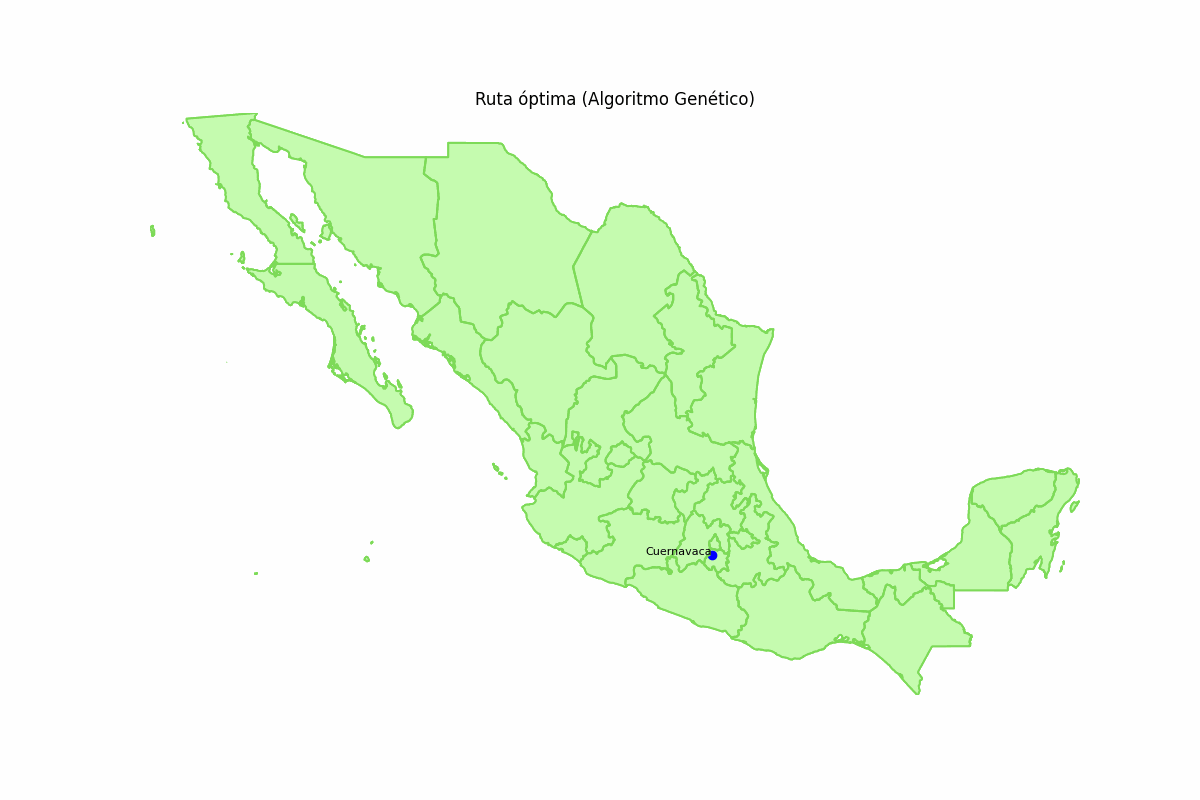

In [39]:
# Graficar paso a paso la mejor ruta del Algoritmo Genético
import matplotlib.pyplot as plt
import imageio
import os
from IPython.display import Image

# Crear un directorio para guardar las imágenes
output_dir = 'frames_ga'
os.makedirs(output_dir, exist_ok=True)

# Extraer las ciudades seleccionadas en el orden de la mejor ruta
ciudades_seleccionadas = ciudades_df.iloc[mejor_individuo]

# Generar los gráficos para cada paso de la ruta
for k in range(1, len(ciudades_seleccionadas) + 1):
    plt.figure(figsize=(12, 8))

    mapa_mexico.boundary.plot(ax=plt.gca(), color='#7DDA58')
    mapa_mexico.plot(ax=plt.gca(), color='#C6FCB0', edgecolor='#7DDA58')

    # Trazar la línea de la ruta
    plt.plot(ciudades_seleccionadas['Longitud'][:k], ciudades_seleccionadas['Latitud'][:k], color='blue', linestyle='-')

    # Graficar los puntos
    plt.scatter(ciudades_seleccionadas['Longitud'][:k], ciudades_seleccionadas['Latitud'][:k], color='blue')

    # Añadir nombres
    for i, row in ciudades_seleccionadas.iloc[:k].iterrows():
        plt.text(row['Longitud'], row['Latitud'], row['Capital'], fontsize=8, ha='right')

    plt.title('Ruta óptima (Algoritmo Genético)')
    plt.grid(False)
    plt.axis('off')
    plt.margins(0)

    # Guardar cada paso como imagen
    plt.savefig(f'{output_dir}/frame_{k}.png')
    plt.close()

# Crear el GIF
images = []
for k in range(1, len(ciudades_seleccionadas) + 1):
    images.append(imageio.imread(f'{output_dir}/frame_{k}.png'))
imageio.mimsave('ruta_optima_ga.gif', images, duration=3)

# Mostrar el GIF en Colab
Image(filename='ruta_optima_ga.gif')